In [16]:
import pandas as pd 
import numpy as np 

In [17]:
final_df = pd.read_csv("nhtsa_ges_extracted.csv")

In [18]:
# rename columns 
final_df = final_df.rename( columns = {"MDRDSTRD" : "distraction", "PJ" : "police jurisdiction", "REGION" : "region",
        "PER_TYP" : "person involved", "AGE" : "age", "SEX" : "sex", "ALTRSULT" : "alcohol", "DAY_WEEK" : "dow", "HOUR" : "hr", "INT_HWY" : "interstate hwy", "LAND_USE" : "population class", "MAN_COLL" : "collision",
        "MAX_SEV" : "injury", "MINUTE" : "min", "MONTH" : "month", "RELJCT2" : "specific location", "REL_ROAD" : "relation to road", "TYP_INT" : "intersection type", "WRK_ZONE" : "work zone", "VNUM_LAN" : "lanes", "AOI1" : "area of impact",
        "WEIGHT" : "weight", "TRAV_SP" : "speed", "VSPD_LIM" : "speed limit", "YEAR": "year", "ACC_TYPE" : "crash type", "MAKE": "make", "NUMOCCS" : "vehicle occupants"})

### Creating distracted/not-distracted binary variable 

In [19]:
final_df["distracted_binary"] = 0
final_df.loc[((final_df['distraction'] != 0) & (final_df['distraction'] != 96) & (final_df['distraction'] != 99)), 'distracted_binary'] = 1
distracted = final_df.loc[final_df['distracted_binary'] == 1]
non_distracted = final_df.loc[final_df['distracted_binary'] == 0]
print ("Distracted Cases {}\nNon-Distracted Cases {}".format(len(distracted), len(non_distracted)))

Distracted Cases 55724
Non-Distracted Cases 480296


### Dataframe presents no need for dropping null items


In [20]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536020 entries, 0 to 536019
Data columns (total 32 columns):
Unnamed: 0           536020 non-null int64
CASENUM              536020 non-null float64
non_motorist         536020 non-null int64
CASENUM_VEH_NO       536020 non-null object
distraction          536020 non-null float64
region               536020 non-null float64
weight               536020 non-null float64
person involved      536020 non-null float64
age                  536020 non-null float64
sex                  536020 non-null float64
alcohol              536020 non-null float64
dow                  536020 non-null float64
hr                   536020 non-null float64
interstate hwy       536020 non-null float64
population class     536020 non-null float64
collision            536020 non-null float64
injury               536020 non-null float64
min                  536020 non-null float64
month                536020 non-null float64
specific location    536020 non-null fl

### Values Key 
#### N/R : Not Reported
#### U/K: Unknown

### Adjust Time of Day Labels

In [21]:
final_df.loc[(final_df['hr'] >= 0.0) & (final_df['hr'] < 6.0), 'hr'] = 101
final_df.loc[(final_df['hr'] >=  6.0) & (final_df['hr'] < 10.0), 'hr'] = 102
final_df.loc[(final_df['hr'] >=  10.0) & (final_df['hr'] < 16.0), 'hr'] = 103
final_df.loc[(final_df['hr'] >=  16.0) & (final_df['hr'] < 20.0), 'hr'] = 104
final_df.loc[(final_df['hr'] >=  20.0) & (final_df['hr'] <= 23.0), 'hr'] = 105
final_df['hr'] = final_df['hr'].astype(str)
final_df.loc[(final_df['hr'] == '101.0'), 'hr'] = "late_night"
final_df.loc[(final_df['hr'] == '102.0'), 'hr']  = "morning_rush"
final_df.loc[(final_df['hr'] == '103.0'), 'hr']  = "afternoon"
final_df.loc[(final_df['hr'] == '104.0'), 'hr']  = "afternoon_rush"
final_df.loc[(final_df['hr'] == '105.0'), 'hr']  = "night"

### Make age categorical 

In [22]:
final_df = final_df.loc[final_df['age'] > 14]
final_df.loc[(final_df['age'] == 997) | (final_df['age'] == 998), 'age'] = 0
final_df.loc[(final_df['age'] == 999), 'age'] = 6
final_df.loc[(final_df['age'] < 25) & (final_df['age'] >= 15), 'age'] = 1
final_df.loc[(final_df['age'] < 35) & (final_df['age'] >= 25), 'age'] = 2
final_df.loc[(final_df['age'] < 45) & (final_df['age'] >= 35), 'age'] = 3
final_df.loc[(final_df['age'] < 65) & (final_df['age'] >= 45), 'age'] = 4
final_df.loc[final_df['age'] >= 65, 'age'] = 5
final_df['age'] = final_df['age'].astype(str)
final_df.loc[(final_df['age'] == "0.0"),  'age'] = 'N/R'
final_df.loc[(final_df['age'] == "1.0"), 'age'] = '15_24'
final_df.loc[(final_df['age'] == "2.0"), 'age'] = '25_34'
final_df.loc[(final_df['age'] == "3.0"), 'age'] = '35_44'
final_df.loc[(final_df['age'] == "4.0"), 'age'] = '45_64'
final_df.loc[(final_df['age'] == "5.0"), 'age'] = 'over_65'
final_df.loc[(final_df['age'] == "6.0"), 'age'] = 'U/K'

### Adjust Sex Labels

In [23]:
final_df['sex'] = final_df['sex'].astype(str)
final_df.loc[final_df['sex'] == '1.0', 'sex'] = "M" 
final_df.loc[final_df['sex'] == '2.0', 'sex'] = "F"
final_df.loc[(final_df['sex'] == '7.0') | (final_df['sex'] == '8.0'), 'sex'] = "N/R"
final_df.loc[(final_df['sex'] == '9.0'), 'sex'] = "U/K"

### Adjust Relation to Road Labels

In [24]:
final_df['relation to road'] = final_df['relation to road'].astype(str)
final_df.loc[(final_df['relation to road'] == '1.0'), 'relation to road'] = 'roadway'
final_df.loc[(final_df['relation to road'] == '2.0'), 'relation to road'] = 'shoulder'
final_df.loc[(final_df['relation to road'] == '5.0') | (final_df['relation to road'] == '6.0'), 'relation to road'] = 'outside_traffic'
final_df.loc[(final_df['relation to road'] == '3.0'), 'relation to road'] = 'median'
final_df.loc[(final_df['relation to road'] == '4.0'), 'relation to road'] = 'roadside'
final_df.loc[(final_df['relation to road'] == '7.0'), 'relation to road'] = 'pking_zone'
final_df.loc[(final_df['relation to road'] == '8.0'), 'relation to road'] = 'gore'
final_df.loc[(final_df['relation to road'] == '10.0'), 'relation to road'] = 'separator'
final_df.loc[(final_df['relation to road'] == '9.0') | (final_df['relation to road'] == '11.0'), 'relation to road'] = 'left_turn_ln'
final_df.loc[(final_df['relation to road'] == '99.0'), 'relation to road'] = 'U/K'
final_df.loc[(final_df['relation to road'] == '97.0') | (final_df['relation to road'] == '98.0'), 'relation to road'] = 'N/R'

### Adjust Collision Labels

In [25]:
final_df['collision'] = final_df['collision'].astype(str)
final_df.loc[final_df['collision'] == '0.0', 'collision'] = 'not_motor_vehicle'
final_df.loc[final_df['collision'] == '1.0', 'collision'] = 'rear_end'
final_df.loc[final_df['collision'] == '2.0', 'collision'] = 'head_on'
final_df.loc[(final_df['collision'] == '3.0') | (final_df['collision'] == '9.0') | (final_df['collision'] == '10.0') | ((final_df['collision'] == '7.0') & (final_df['year'] == 2010.0)), 'collision'] = 'in_reverse'
final_df.loc[(final_df['collision'] == '6.0') | (final_df['collision'] == '4.0'), 'collision'] = 'angle'
final_df.loc[(final_df['collision'] == '7.0') | (final_df['collision'] == '8.0') | (final_df['collision'] == '5.0') | ((final_df['collision'] == '6.0') & (final_df['year'] == 2010.0)), 'collision'] = 'side_swipe'
final_df.loc[(final_df['collision'] == '11.0') | ((final_df['collision'] == '8.0') & (final_df['year'] == 2010.0)) , 'collision'] = 'other'
final_df.loc[(final_df['collision'] == '99.0') | ((final_df['collision'] == '9.0') & (final_df['year'] == 2010.0)), 'collision'] = 'U/K'
final_df.loc[(final_df['collision'] == '97.0') | (final_df['collision'] == '98.0'), 'collision'] = 'N/R'


### Adjust Injury Columns

In [26]:
final_df['injury'] = final_df['injury'].astype(str)
final_df.loc[(final_df['injury'] == '0.0'), 'injury'] = 'none'
final_df.loc[(final_df['injury'] == '1.0'), 'injury'] = 'possible'
final_df.loc[(final_df['injury'] == '2.0'), 'injury'] = 'non_incap'
final_df.loc[(final_df['injury'] == '3.0'), 'injury'] = 'incap'
final_df.loc[(final_df['injury'] == '4.0'), 'injury'] = 'fatal'
final_df.loc[(final_df['injury'] == '5.0'), 'injury'] = 'injury'
final_df.loc[(final_df['injury'] == '9.0'), 'injury'] = 'U/K'
final_df = final_df.loc[(final_df['injury'] != '8.0')]
final_df = final_df.loc[(final_df['injury'] != '6.0')] 

### Adjust Speed Limit Labels

In [27]:
final_df.loc[(final_df['speed limit'] == 99.0), 'speed limit'] = 1000
final_df.loc[(final_df['speed limit'] == 97.0), 'speed limit'] = 1001
final_df.loc[(final_df['speed limit'] == 98.0), 'speed limit'] = 1001
final_df.loc[(final_df['speed limit'] == 99.0), 'speed limit'] = 1002
final_df.loc[(final_df['speed limit'] >= 1) & (final_df['speed limit'] <= 15 ), 'speed limit'] = 1
final_df.loc[(final_df['speed limit'] > 15) & (final_df['speed limit'] <= 25 ), 'speed limit'] = 2
final_df.loc[(final_df['speed limit'] > 25) & (final_df['speed limit'] <= 35 ), 'speed limit'] = 3
final_df.loc[(final_df['speed limit'] > 35) & (final_df['speed limit'] <= 45 ), 'speed limit'] = 4
final_df.loc[(final_df['speed limit'] > 45) & (final_df['speed limit'] <= 55 ), 'speed limit'] = 5
final_df.loc[(final_df['speed limit'] > 55) & (final_df['speed limit'] <= 85 ), 'speed limit'] = 6
final_df.loc[(final_df['speed limit'] > 85) & (final_df['speed limit'] < 1000 ), 'speed limit'] = 7
final_df['speed limit'] = final_df['speed limit'].astype(str)

In [28]:
final_df.loc[(final_df['speed limit'] == '1000.0'), 'speed limit'] = "no_limit"
final_df.loc[(final_df['speed limit'] == '1.0'), 'speed limit'] = "1_15"
final_df.loc[(final_df['speed limit'] == '2.0'), 'speed limit'] = "15_25"
final_df.loc[(final_df['speed limit'] == '3.0'), 'speed limit'] = "25_35"
final_df.loc[(final_df['speed limit'] == '4.0'), 'speed limit'] = "35_45"
final_df.loc[(final_df['speed limit'] == '5.0'), 'speed limit'] = "45_55"
final_df.loc[(final_df['speed limit'] == '6.0'), 'speed limit'] = "55_85"
final_df.loc[(final_df['speed limit'] == '7.0'), 'speed limit'] = "above_85"
final_df.loc[(final_df['speed limit'] == '1001.0'), 'speed limit'] = "N/R"
final_df.loc[(final_df['speed limit'] == '1002.0'), 'speed limit'] = "U/K"

In [29]:
final_df['speed limit'].value_counts()

35_45       131616
25_35       129392
N/R          75247
45_55        73119
55_85        61927
15_25        46864
0.0          12885
1_15          3066
no_limit      1535
Name: speed limit, dtype: int64

### Adjust Vehicle Occupants Labels

No handles with labels found to put in legend.


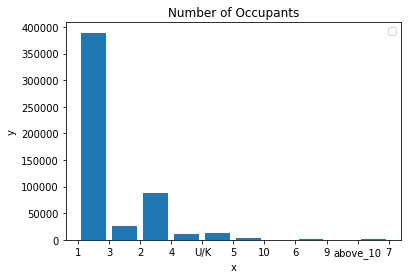

In [42]:
import matplotlib.pyplot as plt

occupants = list(final_df['vehicle occupants'])
bins = [0,1,2,3,4,5,6,7,8,9,10]

plt.hist(occupants, bins, histtype='bar', rwidth=0.8)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Number of Occupants')
plt.legend()
plt.show()

In [31]:
final_df['vehicle occupants'] = final_df['vehicle occupants'].astype(str)
final_df.loc[(final_df['vehicle occupants'] == '97.0'), 'vehicle occupants'] = "N/R"
final_df.loc[(final_df['vehicle occupants'] == '99.0'), 'vehicle occupants'] = "U/K"
final_df.loc[(final_df['vehicle occupants'] == '1.0'), 'vehicle occupants'] = "1"
final_df.loc[(final_df['vehicle occupants'] == '2.0'), 'vehicle occupants'] = "2"
final_df.loc[(final_df['vehicle occupants'] == '3.0'), 'vehicle occupants'] = "3"
final_df.loc[(final_df['vehicle occupants'] == '4.0'), 'vehicle occupants'] = "4"
final_df.loc[(final_df['vehicle occupants'] == '5.0'), 'vehicle occupants'] = "5"
final_df.loc[(final_df['vehicle occupants'] == '6.0'), 'vehicle occupants'] = "6"
final_df.loc[(final_df['vehicle occupants'] == '7.0'), 'vehicle occupants'] = "7"
final_df.loc[(final_df['vehicle occupants'] == '8.0'), 'vehicle occupants'] = "8"
final_df.loc[(final_df['vehicle occupants'] == '9.0'), 'vehicle occupants'] = "9"
final_df.loc[(final_df['vehicle occupants'] == '10.0'), 'vehicle occupants'] = "10"
final_df.loc[(final_df['vehicle occupants'] != '1') & (final_df['vehicle occupants'] != '2') & (final_df['vehicle occupants'] != '3') & (final_df['vehicle occupants'] != '4') & (final_df['vehicle occupants'] != '5') & (final_df['vehicle occupants'] != '6') & (final_df['vehicle occupants'] != '7') & (final_df['vehicle occupants'] != '8') & (final_df['vehicle occupants'] != '9') & (final_df['vehicle occupants'] != '10') & (final_df['vehicle occupants'] != 'U/K') & (final_df['vehicle occupants'] != 'N/R'), 'vehicle occupants'] = "above_10"

In [32]:
final_df.to_csv(r"C:\Users\murra667\Documents\Springboard\Capstone_2\After 2010\2010_2015_GES_k_modes_input.csv")